In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.input {
    display: none !important;
}
.prompt.output_prompt {
    visibility: hidden;
}
</style>
""")

In [2]:
df = pd.read_csv('../data/data.csv', parse_dates=[0])

In [3]:
df = df.set_index('Datetime')

# Internet Speed @karepalas

In [13]:
print(f'From: {str(df.index.min())} To: {str(df.index.max())}')

From: 2018-11-16 12:01:18.059874 To: 2018-11-18 15:29:14.770975


## Overall Summary

In [14]:
df.agg({
    'Ping (ms)': ['min', 'max', 'mean', 'median'],
    'Download (Mbit/s)': ['min', 'max', 'mean', 'median'],
    'Upload (Mbit/s)': ['min', 'max', 'mean', 'median']
})

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
min,11.69500,0.4200,0.540000
max,832.88200,25.5400,5.540000
mean,48.61475,12.4275,3.908214
median,16.04800,11.9850,4.990000


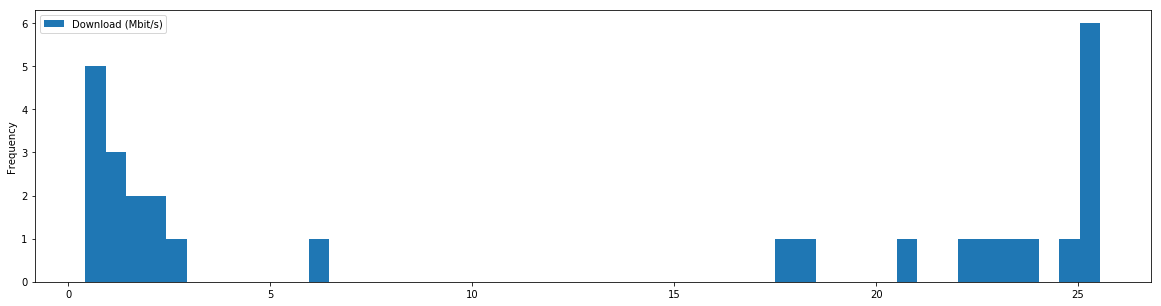

In [23]:
_ = df.plot.hist(y='Download (Mbit/s)', bins=50, figsize=(20, 5))

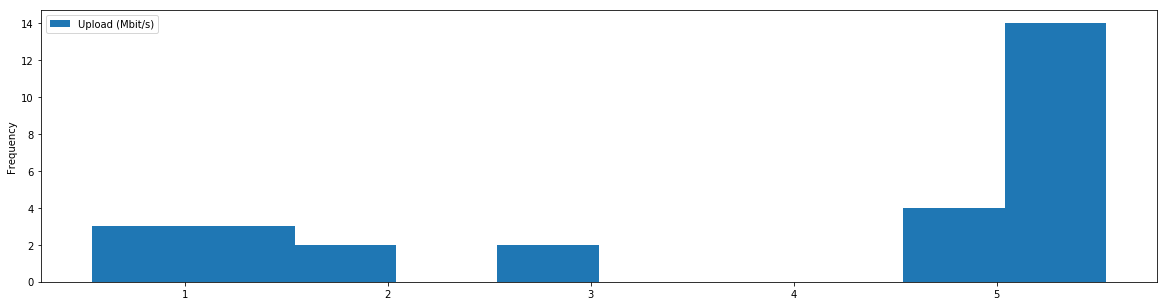

In [25]:
_ = df.plot.hist(y='Upload (Mbit/s)', bins=10, figsize=(20, 5))

## Daily summary

In [ ]:
df.resample('D').agg({
    'Ping (ms)': ['min', 'max', 'mean', 'median'],
    'Download (Mbit/s)': ['min', 'max', 'mean', 'median'],
    'Upload (Mbit/s)': ['min', 'max', 'mean', 'median']
})

## Hourly summary

In [ ]:
hourly = df.groupby(df.index.map(lambda t: t.hour)).agg({
    'Ping (ms)': ['min', 'max', 'mean', 'median'],
    'Download (Mbit/s)': ['min', 'max', 'mean', 'median'],
    'Upload (Mbit/s)': ['min', 'max', 'mean', 'median']
})

In [ ]:
for col in hourly.columns.levels[0][1:]:
    _ = hourly[col][['min', 'max', 'mean']].plot(
        figsize=(20, 4),
        style=[':', ':', '-'],
        title=col)